In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("demo.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   product   13 non-null     object 
 1   amount    13 non-null     int64  
 2   uid       13 non-null     int64  
 3   paid      13 non-null     float64
 4   date      13 non-null     object 
 5   returned  9 non-null      object 
 6   reason    5 non-null      object 
 7   province  13 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 640.0+ bytes


In [3]:
#date should be datetime type
df['date'] = df['date'].astype('datetime64')
#uid can have letters
df['uid'] = df['uid'].astype('str')

In [4]:
df.head(7)

,product,amount,uid,paid,date,returned,reason,province
0,A,1,111,5.247826,2020-01-01,N,NaN,abc
1,A,3,222,15.743478,2020-01-02,n,NaN,de
2,B,2,333,8.247096,2020-01-02,Y,bad quality,abd
3,B,5,444,20.617740,2020-01-05,no,NaN,abc
4,B,2,555,8.247096,2020-01-07,yes,no longer needed,de
5,C,4,666,33.600000,2020-01-07,NaN,NaN,fde
6,C,3,777,25.200000,2020-01-06,yes,bad quality,ser


In [5]:
df['returned'].unique()

array(['N', 'n', 'Y', 'no', 'yes', nan], dtype=object)

In [6]:
df['returned'] = df['returned'].map({
    "Y" : "Y",
    "yes" : "Y",
    "no" : "N",
    "N" : "N",
    "n" : "N"
}
)

In [7]:
df['returned'].unique()

array(['N', 'Y', nan], dtype=object)

In [8]:
#replace null values
df['returned'].replace(np.NaN , 'na')

0      N
1      N
2      Y
3      N
4      Y
5     na
6      Y
7     na
8      Y
9     na
10     N
11    na
12     Y
Name: returned, dtype: object

In [9]:
df['reason'].value_counts(normalize = True)

bad quality         0.4
no longer needed    0.4
don’t like it       0.2
Name: reason, dtype: float64

In [10]:
#get the reasons for the return by each product
df.groupby('product')['reason'].value_counts(normalize = True)

product  reason          
B        bad quality         0.5
         no longer needed    0.5
C        bad quality         1.0
D        no longer needed    1.0
G        don’t like it       1.0
Name: reason, dtype: float64

In [11]:
#draw chart
Series_Pie = df.groupby('product')['reason'].value_counts(normalize = True)
Series_Pie

product  reason          
B        bad quality         0.5
         no longer needed    0.5
C        bad quality         1.0
D        no longer needed    1.0
G        don’t like it       1.0
Name: reason, dtype: float64

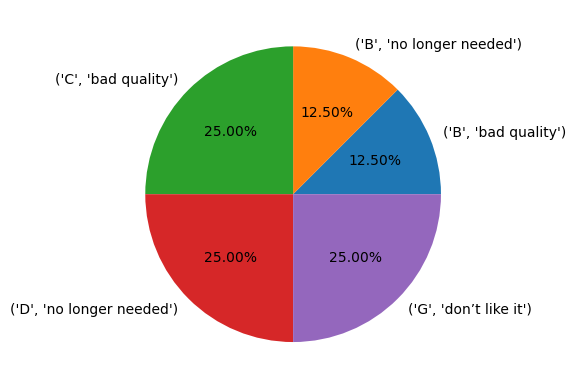

In [12]:
plt.pie(
    x = Series_Pie,
    labels = Series_Pie.index,
    autopct = '%.2f%%'
)
plt.show()

In [ ]:
#end
#Lydia Guo